In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('digit-recognizer/train.csv')

In [4]:
data.head()
# data.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_array = np.array(data)
m, n = data_array.shape
np.random.shuffle(data_array)

In [6]:
data_dev = data_array[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data_array[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [7]:
Y_train.max()

9

In [8]:
X_train[:,0].shape

(784,)

In [9]:
# Helper functions, Forward prop and Back prop

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5    
    W2 = np.random.rand(10, 10) - 0.5    
    b2 = np.random.rand(10, 1) - 0.5    
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def d_relu(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * d_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [10]:
# def loss(X, Y, A2):
#     m = Y.size
#     log_likelihood = -np.log(A2[Y, range(m)])
#     loss = 1/m * np.sum(log_likelihood)
#     return loss

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
W1, b1, W2, b2 = init_params()

In [18]:
def gradient_descent(X, Y, alpha, epoch, W1, b1, W2, b2):
    for i in range(epoch + 1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("epoch: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.001, 1500, W1, b1, W2, b2)

epoch:  0
[6 3 9 ... 8 5 8] [6 3 9 ... 8 6 8]
0.881780487804878
epoch:  50
[6 3 9 ... 8 5 8] [6 3 9 ... 8 6 8]
0.8818048780487805
epoch:  100
[6 3 9 ... 8 5 8] [6 3 9 ... 8 6 8]
0.8818048780487805
epoch:  150
[6 3 9 ... 8 5 8] [6 3 9 ... 8 6 8]
0.8818048780487805
epoch:  200
[6 3 9 ... 8 5 8] [6 3 9 ... 8 6 8]
0.8818048780487805


KeyboardInterrupt: 

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  8


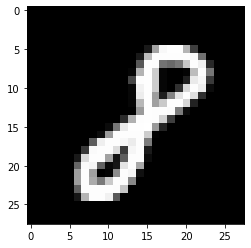

Prediction:  [9]
Label:  9


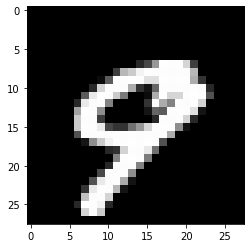

In [33]:
test_prediction(6, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)

In [34]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 5 1 7 3 8 1 1 1 2 3 8 1 8 2 8 0 2 6 9 4 9 0 1 1 3 8 9 2 3 5 4 7 7 9 6 7
 8 9 3 9 8 0 9 2 7 5 6 8 9 9 8 4 2 4 9 5 2 0 7 1 6 9 8 2 9 4 3 6 7 4 2 8 0
 4 8 3 5 0 8 9 4 4 9 7 3 6 0 3 3 3 1 7 7 7 3 2 1 7 9 2 3 3 1 8 9 4 2 3 5 8
 2 6 9 1 2 4 7 4 4 7 3 7 2 2 5 1 2 5 7 7 4 6 2 3 6 6 7 6 1 7 7 1 9 7 9 6 4
 3 4 8 1 9 3 3 8 4 4 9 6 6 9 6 3 0 5 6 1 5 6 5 4 9 1 1 6 9 8 7 4 9 1 4 0 2
 3 3 5 7 6 9 0 7 1 7 2 6 9 3 0 3 1 3 5 2 8 3 6 4 1 1 9 0 8 9 1 9 4 5 9 5 7
 1 6 8 7 6 3 2 0 0 3 4 7 9 3 7 9 7 2 8 9 5 3 1 6 0 5 9 4 6 9 7 6 5 9 7 3 9
 4 9 1 5 1 3 7 9 6 9 4 9 4 8 5 4 0 5 3 3 7 3 5 7 0 7 6 0 5 7 5 9 5 4 0 5 7
 9 4 6 1 9 5 7 9 1 5 4 0 1 7 7 3 6 6 6 0 0 1 9 3 0 3 1 9 8 2 2 4 4 7 1 9 2
 5 0 6 0 1 6 5 7 0 6 5 2 8 2 6 2 1 4 3 2 8 5 8 4 1 2 2 9 0 9 4 2 0 1 1 0 9
 9 6 0 8 7 1 6 9 3 5 4 3 7 4 4 7 6 7 7 3 2 3 6 5 7 9 5 7 0 6 3 6 1 0 9 4 7
 6 4 9 6 1 6 2 4 5 8 2 4 3 2 0 6 3 1 5 3 2 3 5 8 4 8 5 3 0 3 7 0 0 0 9 7 0
 6 7 6 3 9 4 9 3 4 1 3 9 9 9 9 1 8 9 7 6 1 8 3 9 3 7 0 2 6 7 4 9 8 5 7 9 8
 7 7 1 8 8 5 7 1 2 1 3 7 

0.878